# Ejemplo de Scikit-Learn - Algoritmo KNN

El proyecto [*Scikit-Learn*](https://scikit-learn.org) es una biblioteca de código abierto, especializada en aprendizaje supervisado y no supervisado, La gran variedad de algoritmos y utilidades de *Scikit-Learn* la convierten en la herramienta básica para empezar a programar y estructurar sistemas de análisis datos y modelado estadístico. Los algoritmos de *Scikit-Learn* se combinan y depuran con otras estructuras de datos y aplicaciones externas como *Pandas*.

*Scikit-Learn* cuenta con las siguientes funcionalidades:

* Clasificación.
* Regresión.
* Clusterización.
* Reducción de dimensionalidad.
* Selección de modelos.
* Preprocesamiento.

## Ejemplo ilustrativo.

El dataframe **`compañia`** contiene datos ficticios de sucursales de compañías en diversas regiones geográficas.

In [1]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

In [2]:
compañia = pd.DataFrame({'codigo':(100, 
                                   110, 
                                   120, 
                                   130, 
                                   140, 
                                   150,
                                   160,
                                   170),
                         'Compañía':('Nonename-Org',
                                    'Corporativo Inc',
                                    'Organización (Ex).',
                                    'Sin Nombre S.A. de C.V.',
                                    'Sombrilla Corp.',
                                    'El Baratillo',
                                    'El Changarro Perron',
                                    'ODISA'),
                         'Norte':(12,
                                    101,
                                    None,
                                    1,
                                    8,
                                    2,
                                    14,
                                    6),
                          'Occidente':(24,
                                    33,
                                    15,
                                    21,
                                    7,
                                    11,
                                    8,
                                    3),
                         'Centro':(15,
                                    96,
                                    19,
                                    103,
                                    40,
                                    121,
                                    0,
                                    5),
                         'Sur':(18,
                                  23,
                                  14,
                                  126,
                                  79,
                                  42,
                                  0,
                                  None)}).set_index('codigo')

In [3]:
compañia

,Compañía,Norte,Occidente,Centro,Sur
codigo,,,,,
100,Nonename-Org,12.0,24,15,18.0
110,Corporativo Inc,101.0,33,96,23.0
120,Organización (Ex).,NaN,15,19,14.0
130,Sin Nombre S.A. de C.V.,1.0,21,103,126.0
140,Sombrilla Corp.,8.0,7,40,79.0
150,El Baratillo,2.0,11,121,42.0
160,El Changarro Perron,14.0,8,0,0.0
170,ODISA,6.0,3,5,NaN


### Lista de DNS
Esta sería nuestra lista de DNS. Es decir, las empresas que han solicitado no recibir encuestas.

In [4]:
lista_dns = [{"Id":1, "Nombre":'NONENAME ORG'},{"Id":2, "Nombre":'Sombrilla Co'}, 
            {"Id":3, "Nombre":'Organización X'}]

In [5]:
lista_dns

[{'Id': 1, 'Nombre': 'NONENAME ORG'},
 {'Id': 2, 'Nombre': 'Sombrilla Co'},
 {'Id': 3, 'Nombre': 'Organización X'}]

In [6]:
nom_comp = tuple(x['Nombre'] for x in lista_dns if x['Nombre'])

In [7]:
nom_comp

('NONENAME ORG', 'Sombrilla Co', 'Organización X')

## Función que limpia y divide el nombre de la compañía
Esta función remueve o reemplaza ciertos caractéres y segmenta el nombre de la compañía en bloques de 3 en 3 caractéres.

In [8]:
def limpia_nom_comp(nombre, n=3):
    nombre = nombre.lower()
    remueve = [")","(",".","|","[","]","{","}","'"]
    rx = '[' + re.escape(''.join(remueve)) + ']'
    nombre = re.sub(rx, '', nombre)
    nombre = nombre.replace('&', 'y')
    nombre = nombre.replace(',', ' ')
    nombre = nombre.replace('_', ' ')
    nombre = nombre.title()
    nombre = re.sub(' +', ' ', nombre).strip()
    nombre = re.sub(r'[,-./]|\sBD',r'', nombre)
    limpia_nom_comp = zip(*[nombre[i:] for i in range(n)])
    return [''.join(ngram) for ngram in limpia_nom_comp]

In [9]:
a_encuestar = compañia.to_dict('r')

In [10]:
a_encuestar

[{'Compañía': 'Nonename-Org',
  'Norte': 12.0,
  'Occidente': 24,
  'Centro': 15,
  'Sur': 18.0},
 {'Compañía': 'Corporativo Inc',
  'Norte': 101.0,
  'Occidente': 33,
  'Centro': 96,
  'Sur': 23.0},
 {'Compañía': 'Organización (Ex).',
  'Norte': nan,
  'Occidente': 15,
  'Centro': 19,
  'Sur': 14.0},
 {'Compañía': 'Sin Nombre S.A. de C.V.',
  'Norte': 1.0,
  'Occidente': 21,
  'Centro': 103,
  'Sur': 126.0},
 {'Compañía': 'Sombrilla Corp.',
  'Norte': 8.0,
  'Occidente': 7,
  'Centro': 40,
  'Sur': 79.0},
 {'Compañía': 'El Baratillo',
  'Norte': 2.0,
  'Occidente': 11,
  'Centro': 121,
  'Sur': 42.0},
 {'Compañía': 'El Changarro Perron',
  'Norte': 14.0,
  'Occidente': 8,
  'Centro': 0,
  'Sur': 0.0},
 {'Compañía': 'ODISA', 'Norte': 6.0, 'Occidente': 3, 'Centro': 5, 'Sur': nan}]

### TF-IDF

TF-IDF es un método para generar características de texto multiplicando la frecuencia de un término (generalmente una palabra) en un documento (la Frecuencia de Término, o TF) por la importancia (la Frecuencia de Documento Inversa o IDF) del mismo término en un corpus completo. Este último término pondera las palabras menos importantes (por ejemplo, el, él, etc.) y las palabras que no ocurren con frecuencia hacia arriba. El IDF se calcula así:

```IDF(t) = log_e(Número total de documentos / Número de documentos con el término t en él).```


In [113]:
if nom_comp:
    vectoriza = TfidfVectorizer(min_df=1, analyzer=limpia_nom_comp)
    tf_idf_matrix = vectoriza.fit_transform(nom_comp)
    check_long_comp = 10 if len(nom_comp) >= 10 else len(nom_comp)
    nbrs = NearestNeighbors(n_neighbors=check_long_comp, radius=0.8, n_jobs=-1).fit(tf_idf_matrix)
    (distances,indices) = nbrs.kneighbors(vectoriza.transform([x['Compañía'] for x in a_encuestar]))
else:
    distances = indices = [None] * len(a_encuestar)

In [114]:
(distances,indices)

(array([[1.49011612e-08, 1.34500549e+00, 1.41421356e+00],
        [1.19274881e+00, 1.41421356e+00, 1.41421356e+00],
        [3.97838458e-01, 1.33889092e+00, 1.41421356e+00],
        [1.15470054e+00, 1.28619588e+00, 1.41421356e+00],
        [2.91797506e-01, 1.41421356e+00, 1.41421356e+00],
        [1.19274881e+00, 1.41421356e+00, 1.41421356e+00],
        [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
        [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]]),
 array([[0, 2, 1],
        [1, 2, 0],
        [2, 0, 1],
        [1, 0, 2],
        [1, 2, 0],
        [1, 2, 0],
        [2, 1, 0],
        [2, 1, 0]]))

In [115]:
print(tf_idf_matrix)

  (0, 31)	0.2993851103375717
  (0, 7)	0.2276900931986287
  (0, 2)	0.2276900931986287
  (0, 15)	0.2993851103375717
  (0, 24)	0.2993851103375717
  (0, 11)	0.2993851103375717
  (0, 26)	0.2993851103375717
  (0, 16)	0.2993851103375717
  (0, 27)	0.2993851103375717
  (0, 30)	0.2993851103375717
  (0, 6)	0.2993851103375717
  (0, 1)	0.2993851103375717
  (1, 5)	0.2886751345948129
  (1, 0)	0.2886751345948129
  (1, 9)	0.2886751345948129
  (1, 21)	0.2886751345948129
  (1, 22)	0.2886751345948129
  (1, 18)	0.2886751345948129
  (1, 33)	0.2886751345948129
  (1, 13)	0.2886751345948129
  (1, 23)	0.2886751345948129
  (1, 29)	0.2886751345948129
  (1, 8)	0.2886751345948129
  (1, 3)	0.2886751345948129
  (2, 4)	0.2756924555034742
  (2, 25)	0.2756924555034742
  (2, 35)	0.2756924555034742
  (2, 20)	0.2756924555034742
  (2, 14)	0.2756924555034742
  (2, 10)	0.2756924555034742
  (2, 34)	0.2756924555034742
  (2, 19)	0.2756924555034742
  (2, 28)	0.2756924555034742
  (2, 12)	0.2756924555034742
  (2, 17)	0.275692455503

In [116]:
for id_, ren_encuesta in enumerate(a_encuestar):
    print(id_, ren_encuesta)
    print(indices[id_],distances[id_])
    similares = [nom_comp[x[0]] for x in filter(lambda x: round(x[1], 2) >= 0.8, zip(indices[id_], distances[id_]))]\
    if nom_comp else []

0 {'Compañía': 'Nonename-Org', 'Norte': 12.0, 'Occidente': 24, 'Centro': 15, 'Sur': 18.0}
[0 2 1] [1.49011612e-08 1.34500549e+00 1.41421356e+00]
1 {'Compañía': 'Corporativo Inc', 'Norte': 101.0, 'Occidente': 33, 'Centro': 96, 'Sur': 23.0}
[1 2 0] [1.19274881 1.41421356 1.41421356]
2 {'Compañía': 'Organización (Ex).', 'Norte': nan, 'Occidente': 15, 'Centro': 19, 'Sur': 14.0}
[2 0 1] [0.39783846 1.33889092 1.41421356]
3 {'Compañía': 'Sin Nombre S.A. de C.V.', 'Norte': 1.0, 'Occidente': 21, 'Centro': 103, 'Sur': 126.0}
[1 0 2] [1.15470054 1.28619588 1.41421356]
4 {'Compañía': 'Sombrilla Corp.', 'Norte': 8.0, 'Occidente': 7, 'Centro': 40, 'Sur': 79.0}
[1 2 0] [0.29179751 1.41421356 1.41421356]
5 {'Compañía': 'El Baratillo', 'Norte': 2.0, 'Occidente': 11, 'Centro': 121, 'Sur': 42.0}
[1 2 0] [1.19274881 1.41421356 1.41421356]
6 {'Compañía': 'El Changarro Perron', 'Norte': 14.0, 'Occidente': 8, 'Centro': 0, 'Sur': 0.0}
[2 1 0] [1. 1. 1.]
7 {'Compañía': 'ODISA', 'Norte': 6.0, 'Occidente': 3, '

In [117]:
print('Compañías que coinciden: ', similares)

Compañías que coinciden:  ['Organización X', 'Sombrilla Co', 'NONENAME ORG']


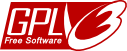
<center>Esta obra está bajo una Licencia GNU GENERAL PUBLIC LICENSE Version 3.</center>

<center>© Daniel Herrera Salgado. 2020.</center>